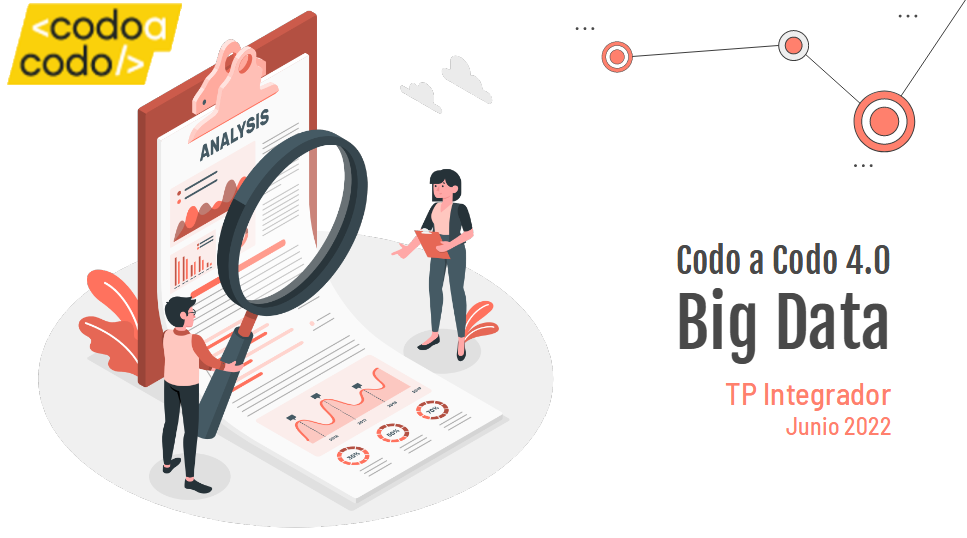

In [ ]:
# A veces necesitamos instalar nuevas librerías en nuestros proyectos
!pip install openpyxl==3.0.10

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# imports
import numpy as np
import pandas as pd
import sqlite3 as sql3
import matplotlib.pyplot as plt
import seaborn as sns

<h2>Paso 1: Alcances del proyecto y obtener datos</h2>
<h3>Alcances del proyecto</h3>
<p>En este proyecto vamos a integrar tres sets de datos con lista de vendedores, lista de artículos y registro de operaciones de un mes, que nos ayudarán a responder a las preguntas: </p>
<ul>
<li>¿Cuál es el artículo más vendido? (unidades)</li>
<li>¿Qué artículo es el que más ingresos nos proporcionó?</li>
<li>¿A qué vendedor debe otorgarse el bono por "Mejor vendedor del mes"?</li>
<li>¿Hay grandes variaciones en ventas a lo largo del mes?</li>
<li>¿Cuál es el país que más compró?</li>
<li>¿Cuáles son los artículos que más se vendieron al país que más compró? (por monto y por unidades)</li>
<li>Mejores vendedores en el país que más compró</li>
</ul>
<p>Para este proyecto utilizaremos herramientas de Pandas para análisis exploratorio, Numpy para el análisis de ciertas columnas y Matplotlib/Seaborn para visualización de resultados.</p>

<h3>Descripción y obtención de los datos</h3>
<h4>Fuentes de datos</h4>
<ul>
<li>articles.db: BD con datos de los artículos.</li>
<li>sellers.xlsx: datos de los vendedores.</li>
<li>orders.csv: registro de las ventas de un mes.</li>
</ul>

In [ ]:
# Levanto los datos en 3 diferentes dataframes

# ARTÍCULOS
conn = sql3.connect('/content/articles.db')
query1 = pd.read_sql_query('SELECT * FROM articles', conn)
df_articles = pd.DataFrame(query1, columns = ['article_id', 'article_name', 'unit_price'])
#print(df_articles)

# VENDEDORES
df_sellers = pd.read_excel('/content/sellers.xlsx', index_col=0)
#print(df_sellers)

# ÓRDENES
df_orders = pd.read_csv('/content/orders.csv')
print(df_orders)


     order_id  week  article_id  quantity  seller_id country_name
0       15024     1       20039        10         10         Peru
1       15025     1       20029        15          5         Peru
2       15026     1       20024         5         14      Bolivia
3       15027     1       20018         9         14       Brazil
4       15028     1       20035         6         15       Mexico
..        ...   ...         ...       ...        ...          ...
995     16019     4       20021         1          7       Brazil
996     16020     4       20040        15         15       Brazil
997     16021     4       20040         2         11     Colombia
998     16022     4       20018        14         11       Brazil
999     16023     4       20026        12          9       Brazil

[1000 rows x 6 columns]


<h2>Paso 2: Explorar y preparar los datos</h2>
<h3>Exploración</h3>

In [ ]:
# Exploración del df de artículos
print('Muestra de datos')
print(df_articles.head())
print('\nFormato del dataframe')
print(df_articles.shape)
print('\nBùsqueda de valores nulos por columna')
print(df_articles.isnull().sum())
print('\nFormato de los datos')
print(df_articles.dtypes)

Muestra de datos
   article_id article_name unit_price
0       20015   Smartphone     525.00
1       20016      Full Pc    2127.81
2       20017      Monitor     230.00
3       20018       Tablet     130.00
4       20019         Desk     130.10

Formato del dataframe
(31, 3)

Bùsqueda de valores nulos por columna
article_id      0
article_name    0
unit_price      0
dtype: int64

Formato de los datos
article_id       int64
article_name    object
unit_price      object
dtype: object


In [ ]:
# Exploración del df de vendedores
print('Muestra de datos')
print(df_sellers.head())
print('\nFormato del dataframe')
print(df_sellers.shape)
print('\nBúsqueda de valores nulos por columna')
print(df_sellers.isnull().sum())
print('\nFormato de los datos')
print(df_sellers.dtypes)

Muestra de datos
                 seller_name
seller_id                   
1           Aveline Swanwick
2                   Jase Doy
3          Oliviero Charkham
4           Cornie Wynrehame
5                Ewell Peres

Formato del dataframe
(15, 1)

Búsqueda de valores nulos por columna
seller_name    0
dtype: int64

Formato de los datos
seller_name    object
dtype: object


In [ ]:
# Exploración del df de órdenes
print('Muestra de datos')
print(df_orders.head())
print('\nFormato del dataframe')
print(df_orders.shape)
print('\nBùsqueda de valores nulos por columna')
print(df_orders.isnull().sum())
print('\nFormato de los datos')
print(df_orders.dtypes)

Muestra de datos
   order_id  week  article_id  quantity  seller_id country_name
0     15024     1       20039        10         10         Peru
1     15025     1       20029        15          5         Peru
2     15026     1       20024         5         14      Bolivia
3     15027     1       20018         9         14       Brazil
4     15028     1       20035         6         15       Mexico

Formato del dataframe
(1000, 6)

Bùsqueda de valores nulos por columna
order_id        0
week            0
article_id      0
quantity        0
seller_id       0
country_name    0
dtype: int64

Formato de los datos
order_id         int64
week             int64
article_id       int64
quantity         int64
seller_id        int64
country_name    object
dtype: object


<h3>Preparación</h3>
<ul>
 <li>Encuentro un inconveniente en la columna de precios de los artículos. Necesito cambiar el formato cadena a float.</li>
 <li>Le doy formato con signo "$".</li>
</ul>


In [50]:
df_articles['unit_price'] = df_articles['unit_price'].astype(float)
print(df_articles.dtypes)
pd.options.display.float_format = '$ {:,.2f}'.format
print(df_articles)

article_name     object
unit_price      float64
dtype: object
                article_name  unit_price
article_id                              
20015             Smartphone    $ 525.00
20016                Full Pc  $ 2,127.81
20017                Monitor    $ 230.00
20018                 Tablet    $ 130.00
20019                   Desk    $ 130.10
20020                  Chair    $ 335.64
20021                  Modem     $ 67.50
20022         Range Extender     $ 20.45
20023               Notebook  $ 1,000.00
20024                Netbook    $ 145.00
20025                    HDD     $ 54.62
20026                    SDD     $ 22.00
20027             Ram Memory     $ 35.95
20028            Motherboard    $ 138.38
20029                  Mouse     $ 30.30
20030             Fan Cooler      $ 4.25
20031                 Webcam     $ 20.07
20032               Keyboard     $ 22.60
20033             Headphones     $ 23.30
20034                Scanner    $ 185.00
20035                   Case     $ 3

<h2>Paso 3: Definir el modelo de datos</h2>
<p>Crearemos un nuevo dataframe a partir de las fuentes de datos proporcionados.</p>


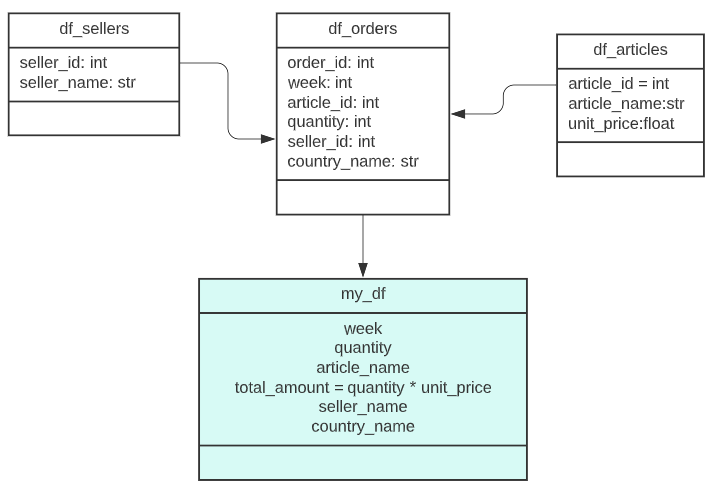

<h2>Paso 4: Correr los pipelines para modelar los datos</h2>
<p>Llamamos pipeline a una serie de procesos en el cual la salida de un proceso es la entrada que utiliza el siguiente proceso.</p>

In [ ]:
# Creo una copia del df base
my_df = df_orders.copy()

# Cambio el índice del df artículos
df_articles.set_index('article_id', inplace=True)

# esa se puede ejecutar sólo una vez, porque elimina esa columna y la convierte en indice

print(my_df)
print(df_articles)

     order_id  week  article_id  quantity  seller_id country_name
0       15024     1       20039        10         10         Peru
1       15025     1       20029        15          5         Peru
2       15026     1       20024         5         14      Bolivia
3       15027     1       20018         9         14       Brazil
4       15028     1       20035         6         15       Mexico
..        ...   ...         ...       ...        ...          ...
995     16019     4       20021         1          7       Brazil
996     16020     4       20040        15         15       Brazil
997     16021     4       20040         2         11     Colombia
998     16022     4       20018        14         11       Brazil
999     16023     4       20026        12          9       Brazil

[1000 rows x 6 columns]
                article_name  unit_price
article_id                              
20015             Smartphone    $ 525.00
20016                Full Pc  $ 2,127.81
20017              

In [ ]:
# Agrego algunas columnas y pongo el campo que me va a servir de "ancla" 
my_df = my_df.assign(article_name = my_df['article_id'])
my_df = my_df.assign(total_amount = my_df['article_id'])
my_df = my_df.assign(seller_name = my_df['seller_id'])

print(my_df)

     order_id  week  article_id  quantity  seller_id country_name  \
0       15024     1       20039        10         10         Peru   
1       15025     1       20029        15          5         Peru   
2       15026     1       20024         5         14      Bolivia   
3       15027     1       20018         9         14       Brazil   
4       15028     1       20035         6         15       Mexico   
..        ...   ...         ...       ...        ...          ...   
995     16019     4       20021         1          7       Brazil   
996     16020     4       20040        15         15       Brazil   
997     16021     4       20040         2         11     Colombia   
998     16022     4       20018        14         11       Brazil   
999     16023     4       20026        12          9       Brazil   

     article_name  total_amount  seller_name  
0           20039         20039           10  
1           20029         20029            5  
2           20024         2002

In [ ]:
# reemplazar los valores en el nuevo df
# df_articles[?]['article_name']
for i in range(len(my_df.index)):   #len devuelve la cantidad de registros
    article = df_articles.loc[my_df.loc[i]['article_name']]['article_name']

    # reemplazo en la columna 'article_name'
    my_df.loc[i,'article_name'] = article
    # reemplazo en la columna 'total_amount'
    my_df.loc[i,'total_amount'] = my_df.loc[i,'quantity'] * df_articles.loc[my_df.loc[i]['total_amount']]['unit_price']
    # reemplazo en la columna 'seller_name'
    my_df.loc[i,'seller_name'] = df_sellers.loc[my_df.loc[i]['seller_name']]['seller_name']


print(my_df)

     order_id  week  article_id  quantity  seller_id country_name  \
0       15024     1       20039        10         10         Peru   
1       15025     1       20029        15          5         Peru   
2       15026     1       20024         5         14      Bolivia   
3       15027     1       20018         9         14       Brazil   
4       15028     1       20035         6         15       Mexico   
..        ...   ...         ...       ...        ...          ...   
995     16019     4       20021         1          7       Brazil   
996     16020     4       20040        15         15       Brazil   
997     16021     4       20040         2         11     Colombia   
998     16022     4       20018        14         11       Brazil   
999     16023     4       20026        12          9       Brazil   

      article_name  total_amount      seller_name  
0    Water Cooling      $ 675.00  Cirilo Grandham  
1            Mouse      $ 454.50      Ewell Peres  
2          Netb

In [ ]:
# elimino las columnas que no necesito
my_df.drop(['order_id', 'article_id', 'seller_id'], axis='columns', inplace=True)

print(my_df)

     week  quantity country_name   article_name  total_amount      seller_name
0       1        10         Peru  Water Cooling      $ 675.00  Cirilo Grandham
1       1        15         Peru          Mouse      $ 454.50      Ewell Peres
2       1         5      Bolivia        Netbook      $ 725.00   Janel O'Curran
3       1         9       Brazil         Tablet    $ 1,170.00   Janel O'Curran
4       1         6       Mexico           Case      $ 227.40  Daisie Slograve
..    ...       ...          ...            ...           ...              ...
995     4         1       Brazil          Modem       $ 67.50       Kati Innot
996     4        15       Brazil       Heatsink      $ 150.00  Daisie Slograve
997     4         2     Colombia       Heatsink       $ 20.00  Vasily Danilyuk
998     4        14       Brazil         Tablet    $ 1,820.00  Vasily Danilyuk
999     4        12       Brazil            SDD      $ 264.00     Onida Cosely

[1000 rows x 6 columns]


<h2>Paso 5: Responder las preguntas</h2>


<h3>1. ¿Cuál es el artículo más vendido? (en unidades)</h3>

In [ ]:
# RESOLUCIÓN ANALÍTICA
my_df2 = my_df.groupby('article_name').sum()
por_cant = my_df2.sort_values('quantity', ascending=False)
#print(por_cant.head(1))
print(por_cant['quantity'].head(1))
print()
print("El artículo más vendido es",por_cant.index[0],"con",por_cant['quantity'][0],"unidades")


article_name
HDD    413
Name: quantity, dtype: int64

El artículo más vendido es HDD con 413 unidades


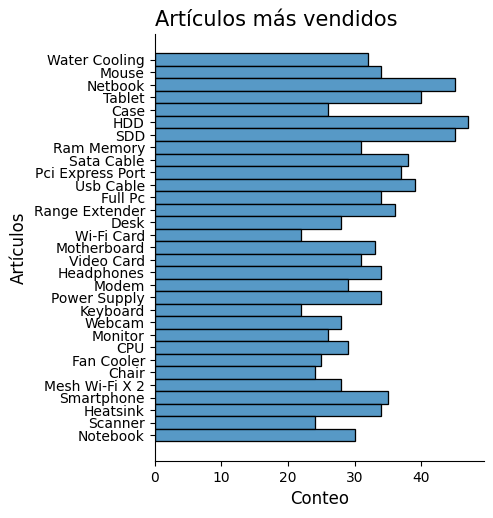

In [ ]:
# RESOLUCIÓN GRÁFICA
plt.style.use('default')
sns.displot(my_df, y='article_name')
#plt.xticks(rotation=90)
plt.ylabel('Artículos', fontsize=12)
plt.xlabel('Conteo', fontsize=12)
plt.title('Artículos más vendidos', loc='left', fontsize=15)
plt.show()


<h3>2. ¿Qué artículo es el que más ingresos nos proporcionó?</h3>

In [ ]:
# RESOLUCIÓN ANALÍTICA
my_df3 = (my_df.groupby('article_name').sum()).sort_values('total_amount', ascending=False).head(5)
print(my_df3['total_amount'])
print("\nEl artículo que más ingresos proporcionó es",my_df3.index[0],"con ventas por $","{:.2f}".format(my_df3['total_amount'][0]))

article_name
Full Pc      $ 538,335.93
Notebook     $ 251,000.00
Smartphone   $ 152,250.00
Chair         $ 69,477.48
Tablet        $ 48,620.00
Name: total_amount, dtype: float64

El artículo que más ingresos proporcionó es Full Pc con ventas por $ 538335.93


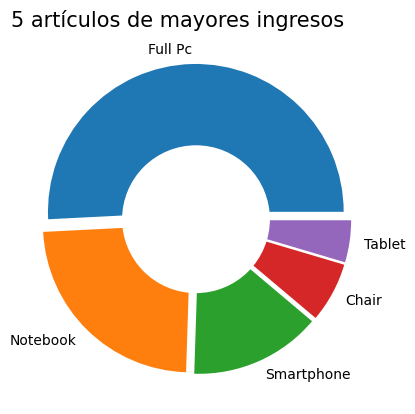

In [ ]:
# RESOLUCIÓN GRÁFICA 
plt.title('5 artículos de mayores ingresos', loc='left', fontsize=15)
explode = (0.05, 0.05, 0.05, 0.05, 0.05)
plt.pie(x=my_df3['total_amount'], labels=my_df3.index,explode=explode, textprops = {'fontsize': 10})

centre_cicle = plt.Circle((0,0),0.5, fc='white')
fig=plt.gcf()
fig.gca().add_artist(centre_cicle)

plt.show()

<h3>3. ¿A qué vendedor debe otorgarse el bono por "Mejor vendedor del mes"?</h3>

In [ ]:
# RESOLUCIÓN ANALÍTICA
my_df4 = (my_df.groupby('seller_name').sum()).sort_values('total_amount', ascending=False)
print(my_df4[['quantity']+['total_amount']])
print("\nEl mejor vendedor es" ,my_df4.index[0],"con un total de ventas por $","{:.2f}".format(my_df4['total_amount'][0]))


                   quantity  total_amount
seller_name                              
Janel O'Curran          703  $ 192,832.47
Brockie Patience        441  $ 142,709.88
Oliviero Charkham       555  $ 141,329.76
Vasily Danilyuk         521  $ 129,157.55
Daisie Slograve         554  $ 120,520.11
Aveline Swanwick        629  $ 118,874.33
Arnold Kilkenny         583   $ 94,552.04
Kati Innot              512   $ 83,704.62
Jase Doy                582   $ 80,628.31
Ewell Peres             496   $ 78,144.32
Onida Cosely            535   $ 77,373.37
Milly Christoffe        442   $ 61,733.69
Tobin Roselli           519   $ 56,984.42
Cornie Wynrehame        523   $ 52,253.57
Cirilo Grandham         470   $ 45,009.40

El mejor vendedor es Janel O'Curran con un total de ventas por $ 192832.47


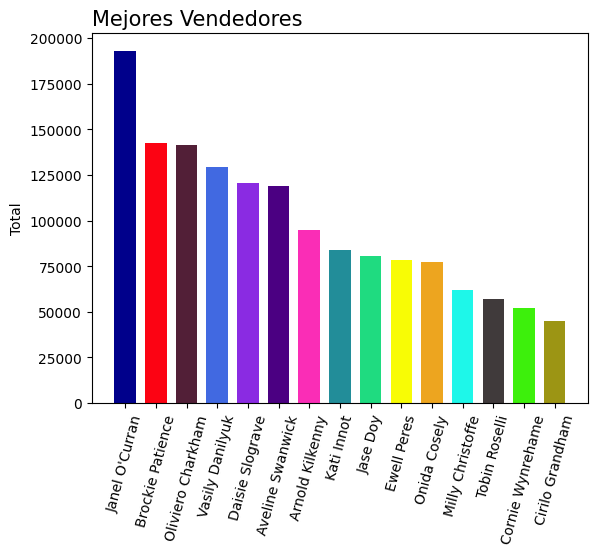

In [ ]:
# RESOLUCIÓN GRÁFICA
colors = ['#00008B','#fc0313','#521f37','#4169E1','#8A2BE2','#4B0082','#fa2db6',
  '#228d99','#1fdb80','#f8fc05','#eda51f','#1ef7e9','#403a3b','#3df00c','#9c9514']
plt.bar(my_df4.index, my_df4['total_amount'], width=0.7, color=colors)
plt.xticks(rotation=75)
plt.ylabel('Total', fontsize=10)
plt.title('Mejores Vendedores', loc='left', fontsize=15)
plt.show()

<h3>4. ¿Hay grandes variaciones en ventas a lo largo del mes?</h3>
<h4>Si es así, ¿en qué momento debería lanzar una campaña de promociones?</h4>


In [ ]:
# RESOLUCIÓN ANALÍTICA
my_df5 = (my_df.groupby('week').sum()).sort_values('total_amount', ascending=False)
print(my_df5)
print("\nDebería lanzarse la campaña para la segunda mitad del mes")

      quantity  total_amount
week                        
1         2449  $ 507,458.81
2         2444  $ 415,364.44
3         2114  $ 329,140.03
4         1058  $ 223,844.56

Debería lanzarse la campaña para la segunda mitad del mes


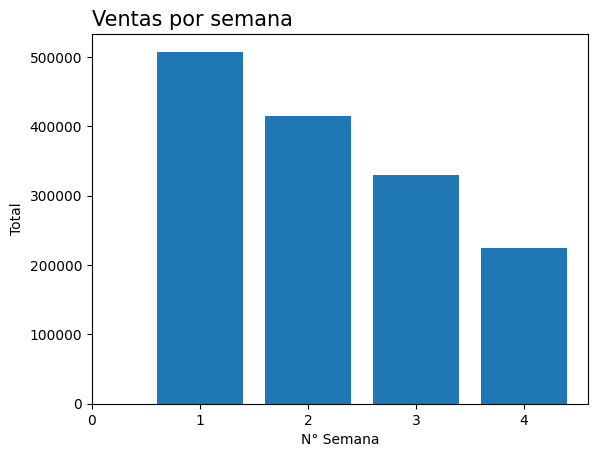

In [ ]:
# RESOLUCIÓN GRÁFICA
plt.bar(my_df5.index,my_df5['total_amount'])
plt.xticks(range(5))
plt.xlabel('N° Semana', fontsize=10)
plt.ylabel('Total', fontsize=10)
plt.title('Ventas por semana', loc='left', fontsize=15)
plt.show()

<h3>5. ¿Cuál es el país que más compró?</h3>

In [ ]:
# RESOLUCIÓN ANALÍTICA
my_df6 = (my_df.groupby('country_name').sum()).sort_values('total_amount', ascending=False)
print(my_df6[['quantity']+['total_amount']])

print()
print(my_df6.index[0],"es el paìs que más compró, con $","{:.2f}".format(my_df6['total_amount'][0]),"y",(my_df6['quantity'][0]), "unidades")

              quantity  total_amount
country_name                        
Brazil            2515  $ 441,271.85
Argentina          947  $ 205,832.78
Colombia           881  $ 177,514.29
Peru              1027  $ 161,421.12
Mexico             846  $ 138,619.99
Venezuela          320   $ 77,684.52
El Salvador        111   $ 57,391.26
Guatemala          202   $ 52,579.25
Honduras           303   $ 36,763.56
Costa Rica         145   $ 34,606.50
Chile              231   $ 24,660.98
Bolivia            181   $ 22,682.80
Uruguay             92   $ 17,843.09
Ecuador            129   $ 17,475.30
Paraguay           123    $ 8,195.12
Puerto Rico         12    $ 1,265.43

Brazil es el paìs que más compró, con $ 441271.85 y 2515 unidades


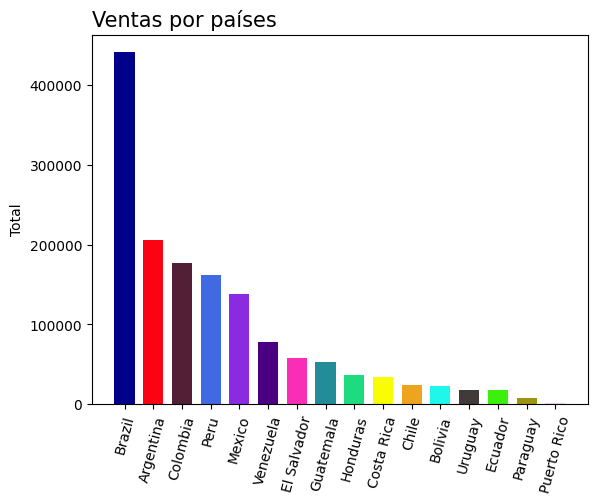

In [ ]:
# RESOLUCIÓN GRÁFICA
colors = ['#00008B','#fc0313','#521f37','#4169E1','#8A2BE2','#4B0082','#fa2db6',
  '#228d99','#1fdb80','#f8fc05','#eda51f','#1ef7e9','#403a3b','#3df00c','#9c9514','#FACFF6']
plt.bar(my_df6.index, my_df6['total_amount'], width=0.7, color=colors)
plt.xticks(rotation=75)
plt.ylabel('Total', fontsize=10)
plt.title('Ventas por países', loc='left', fontsize=15)
plt.show()

<h3>6. ¿Cuáles son los artículos que más se vendieron al país que más compró? (por monto y por unidades)</h3>

In [ ]:
# RESOLUCIÓN ANALÍTICA
country = []
country.append(my_df6.index[0])
my_df7 = my_df.loc[my_df["country_name"] == country[0]]
#print(my_df7)

my_df8q = (my_df7.groupby('article_name').sum()).sort_values('quantity',ascending=False).head(10)
print(my_df8q)
my_df8m = (my_df7.groupby('article_name').sum()).sort_values('total_amount',ascending=False).head(5)
print(my_df8m)
print()
print("El artículo que más ingresos generó en",(my_df6.index[0]),"es",(my_df8m.index[0]),"con $","{:.2f}".format(my_df8m['total_amount'][0]))
print("El artículo que más se vendió es",(my_df8q.index[0]),"con",(my_df8q['quantity'][0]),"unidades")


                  week  quantity  total_amount
article_name                                  
Tablet              41       156   $ 20,280.00
HDD                 45       119    $ 6,499.78
SDD                 33       117    $ 2,574.00
Chair               32       112   $ 37,591.68
Pci Express Port    38       105    $ 1,062.60
Heatsink            30       103    $ 1,030.00
Power Supply        26       103    $ 4,526.85
Motherboard         34       101   $ 13,976.38
Desk                23        97   $ 12,619.70
Ram Memory          21        92    $ 3,307.40
              week  quantity  total_amount
article_name                              
Full Pc         17        63  $ 134,052.03
Notebook        20        83   $ 83,000.00
Smartphone      19        79   $ 41,475.00
Chair           32       112   $ 37,591.68
Tablet          41       156   $ 20,280.00

El artículo que más ingresos generó en Brazil es Full Pc con $ 134052.03
El artículo que más se vendió es Tablet con 156 unidades


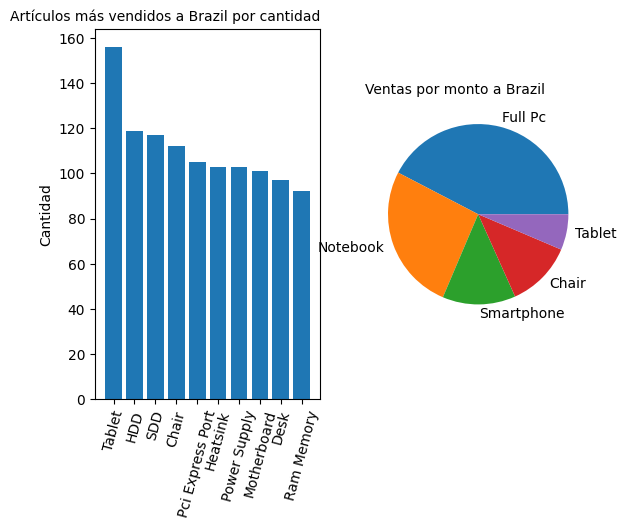

In [ ]:
# RESOLUCIÓN GRÁFICA
plt.subplot(1,2,1)
plt.bar(my_df8q.index, my_df8q['quantity'])
plt.xticks(rotation=75)
#plt.ylabel('Artículos')
plt.ylabel('Cantidad')
plt.title('Artículos más vendidos a '+ country[0] + ' por cantidad', loc='right', fontsize=10)

plt.subplot(1,2,2)
plt.pie(x=my_df8m['total_amount'], labels=my_df8m.index)
plt.title('Ventas por monto a '+ country[0], loc='left', fontsize=10)

plt.show()

<h3>7. Mejores vendedores en el país que más compró</h3>

In [ ]:
# RESOLUCIÓN
my_dfbv = (my_df7.groupby('seller_name').sum()).sort_values('total_amount',ascending=False)
print(my_dfbv[['quantity'] + ['total_amount']])
print()
print("Los 3 mejores vendedores son:")
print("1)",(my_dfbv.index[0]), "- $","{:.2f}".format(my_dfbv['total_amount'][0]))
print("2)",(my_dfbv.index[1]), "- $","{:.2f}".format(my_dfbv['total_amount'][1]))
print("3)",(my_dfbv.index[2]), "- $","{:.2f}".format(my_dfbv['total_amount'][2]))


                   quantity  total_amount
seller_name                              
Daisie Slograve         226   $ 65,283.28
Aveline Swanwick        227   $ 58,771.48
Arnold Kilkenny         184   $ 47,243.54
Kati Innot              151   $ 32,087.32
Tobin Roselli           211   $ 31,997.93
Janel O'Curran          182   $ 31,562.86
Onida Cosely            206   $ 29,354.31
Jase Doy                149   $ 28,493.25
Vasily Danilyuk         124   $ 27,495.77
Milly Christoffe        161   $ 21,247.38
Cirilo Grandham         158   $ 21,061.74
Ewell Peres              91   $ 15,253.22
Oliviero Charkham       195   $ 14,951.72
Brockie Patience        125   $ 10,756.96
Cornie Wynrehame        125    $ 5,711.09

Los 3 mejores vendedores son:
1) Daisie Slograve - $ 65283.28
2) Aveline Swanwick - $ 58771.48
3) Arnold Kilkenny - $ 47243.54


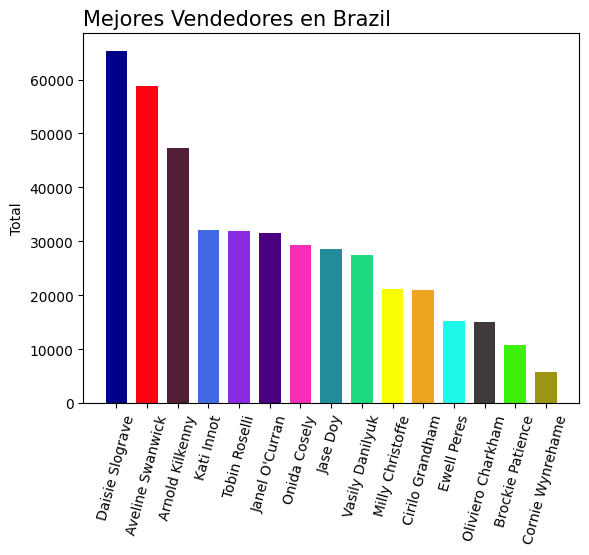

In [ ]:
colors = ['#00008B','#fc0313','#521f37','#4169E1','#8A2BE2','#4B0082','#fa2db6',
  '#228d99','#1fdb80','#f8fc05','#eda51f','#1ef7e9','#403a3b','#3df00c','#9c9514']
plt.bar(my_dfbv.index, my_dfbv['total_amount'], width=0.7, color=colors)
plt.xticks(rotation=75)
plt.ylabel('Total', fontsize=10)

plt.title('Mejores Vendedores en '+ country[0], loc='left', fontsize=15)
plt.show()

<h2>Conclusiones y propuestas</h2>
<p>En este informe mensual se analizaron tres sets de datos, destacando las siguientes observaciones: </p>
<ul>
<li>El artículo más vendido es HDD, pero el que más ingresos proporciona es Full Pc.</li>
<li>Se observan variaciones de ventas a lo largo del mes. En la primera semana la venta es fuerte y luego disminuye a medida que avanza el mes.</li>
<li>Brasil es el país al que más se vende, tanto en unidades como en montos.</li>
<li>El vendedor del mes es Janel O'Curran con un total de ventas por $ 192832,47.</li>
<li>Las Tablets son los artículos que más se venden en Brasil, y Full Pc los que más ingresos generan. </li>
<li>En Brasil, los 3 mejores vendedores son Daisie Slograve, Aveline Swanwick y Arnold Kilkenny.</li>
</ul>
<br>
<h4>Propuestas para mejoras</h4>
<ul>
<li>Se sugiere realizar campañas de promociones a partir de la mitad del mes, para incrementar las ventas.</li>
<li>Además del bono mensual al mejor vendedor, considerar un programa de incentivos según montos de venta.</li>
<li>Revisar promociones en Puerto Rico y Paraguay o evaluar si conviene mantener esos mercados.</li>
</ul>


<h4>Propuestas para mejoras</h4>
<ul>
<li>Se sugiere realizar campañas de promociones a partir de la mitad del mes, para incrementar las ventas.</li>
<li>Además del bono mensual al mejor vendedor, considerar un programa de incentivos según montos de venta.</li>
<li>Revisar promociones en Puerto Rico y Paraguay o evaluar si conviene mantener esos mercados.</li>
</ul>